<a href="https://colab.research.google.com/github/sridevi0323/Animal-Hide---DL/blob/main/CNN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# Specify the path to your desired directory
path_to_directory = '/content/drive/MyDrive/Leather_Dataset'

# Change the working directory to the specified path
os.chdir(path_to_directory)

In [ ]:
# Import necessary libraries
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Check if GPU is available and set it as the runtime
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("No GPU available. Switch to a GPU runtime in Google Colab.")

No GPU available. Switch to a GPU runtime in Google Colab.


In [ ]:
# Define the directories for your dataset
train_dir = '/content/drive/MyDrive/Leather_Dataset'  # Replace with the path to your training dataset
test_dir = '/content/drive/MyDrive/Leather_Dataset'    # Replace with the path to your test dataset

# Set parameters for data augmentation and preprocessing
train_data_gen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
test_data_gen = ImageDataGenerator(rescale=1./255)  # Don't apply data augmentation to the test data

# Create generators for loading and augmenting images
batch_size = 32
train_generator = train_data_gen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=batch_size, class_mode='binary')
test_generator = test_data_gen.flow_from_directory(test_dir, target_size=(150, 150), batch_size=batch_size, class_mode='binary')

Found 1200 images belonging to 2 classes.
Found 1200 images belonging to 2 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

epochs = 20
history = model.fit(train_generator, steps_per_epoch=train_generator.samples // batch_size, epochs=epochs, validation_data=test_generator, validation_steps=test_generator.samples // batch_size)

Epoch 1/20
37/37 [==============================] - 222s 6s/step - loss: 0.5726 - accuracy: 0.7003 - val_loss: 0.4123 - val_accuracy: 0.8159
Epoch 2/20
37/37 [==============================] - 106s 3s/step - loss: 0.2277 - accuracy: 0.9349 - val_loss: 0.1652 - val_accuracy: 0.9611
Epoch 3/20
37/37 [==============================] - 101s 3s/step - loss: 0.1220 - accuracy: 0.9615 - val_loss: 0.0875 - val_accuracy: 0.9755
Epoch 4/20
37/37 [==============================] - 100s 3s/step - loss: 0.0685 - accuracy: 0.9700 - val_loss: 0.0621 - val_accuracy: 0.9789
Epoch 5/20
37/37 [==============================] - 98s 3s/step - loss: 0.0549 - accuracy: 0.9735 - val_loss: 0.0844 - val_accuracy: 0.9789
Epoch 6/20
37/37 [==============================] - 97s 3s/step - loss: 0.0521 - accuracy: 0.9717 - val_loss: 0.0845 - val_accuracy: 0.9780
Epoch 7/20
37/37 [==============================] - 100s 3s/step - loss: 0.0504 - accuracy: 0.9795 - val_loss: 0.1132 - val_accuracy: 0.9721
Epoch 8/20
37/3

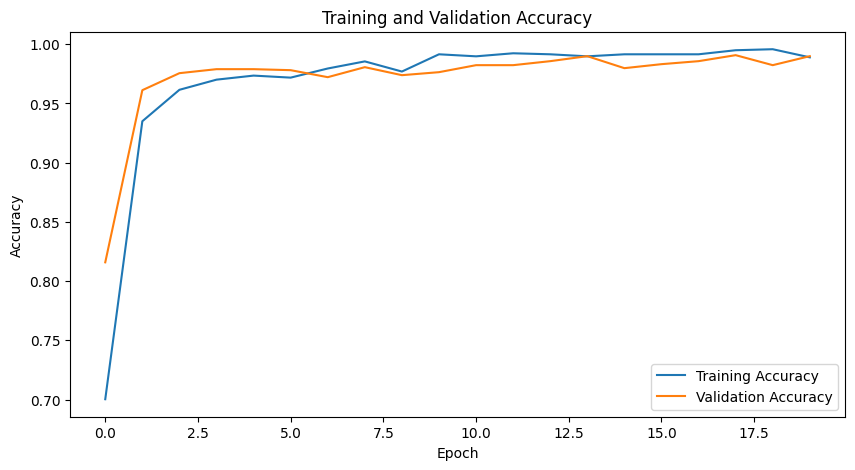

In [ ]:
# Plot the accuracy graph
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# ... (Previous code remains the same)

# Initialize empty lists for true and predicted labels
y_true = []
y_pred = []

# Loop over batches in the test generator
for i in range(len(test_generator)):
    x_batch, y_batch = test_generator[i]
    y_true.extend(y_batch)  # Append true labels
    y_pred_batch = model.predict(x_batch)  # Predict labels for the current batch
    y_pred.extend(np.round(y_pred_batch))  # Append predicted labels

# Calculate the confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_true, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Print the classification report
report = classification_report(y_true, y_pred)
print("\nClassification Report:")
print(report)


1/1 [==============================] - 0s 450ms/step
Confusion Matrix:
[[591   9]
 [  3 597]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99       600
         1.0       0.99      0.99      0.99       600

    accuracy                           0.99      1200
   macro avg       0.99      0.99      0.99      1200
weighted avg       0.99      0.99      0.99      1200



1/1 [==============================] - 0s 190ms/step


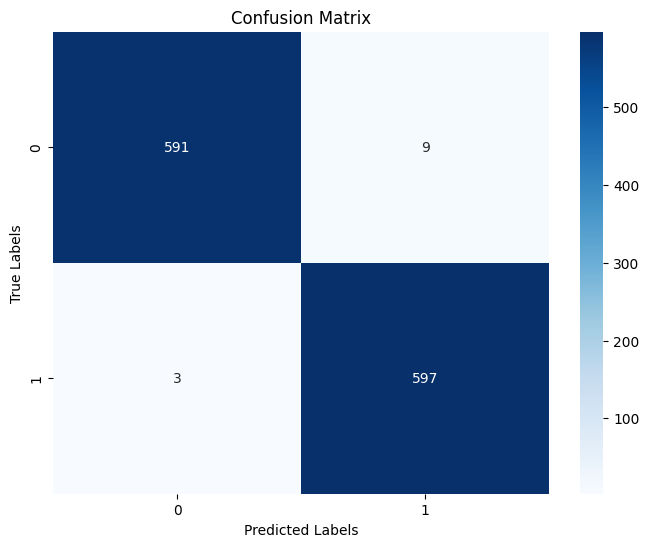

In [ ]:
# ... (Previous code remains the same)

# Calculate the confusion matrix
from sklearn.metrics import confusion_matrix

# Initialize empty lists for true and predicted labels
y_true = []
y_pred = []

# Loop over batches in the test generator
for i in range(len(test_generator)):
    x_batch, y_batch = test_generator[i]
    y_true.extend(y_batch)  # Append true labels
    y_pred_batch = model.predict(x_batch)  # Predict labels for the current batch
    y_pred.extend(np.round(y_pred_batch))  # Append predicted labels

cm = confusion_matrix(y_true, y_pred)

# Visualize the confusion matrix as a heatmap
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Evaluating Metrices

TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)

# calculate accuracy
conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))

# calculate mis-classification
conf_misclassification = 1- conf_accuracy

# calculate the sensitivity
conf_sensitivity = (TP / float(TP + FN))
# calculate the specificity
conf_specificity = (TN / float(TN + FP))

# calculate precision
conf_precision = (TN / float(TN + FP))
# calculate f_1 score
conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
print('-'*50)
print(f'Accuracy: {round(conf_accuracy,2)}')
print(f'Mis-Classification: {round(conf_misclassification,2)}')
print(f'Sensitivity: {round(conf_sensitivity,2)}')
print(f'Specificity: {round(conf_specificity,2)}')
print(f'Precision: {round(conf_precision,2)}')
print(f'f_1 Score: {round(conf_f1,2)}')

True Positives: 597
True Negatives: 591
False Positives: 9
False Negatives: 3
--------------------------------------------------
Accuracy: 0.99
Mis-Classification: 0.01
Sensitivity: 1.0
Specificity: 0.98
Precision: 0.98
f_1 Score: 0.99
